# <a href="https://thetahat.ru/courses/bm-2024-aut"> Статистика ФБМФ </a>

## Задача 1

### Звериный бутстреп

Скачайте архив `animals.zip`, разархивируйте его и положите в ту же папку, где лежит ноутбук. Если у вас не установлена библиотека `skimage` это можно сделать раскомментировав следующую ячейку.

In [ ]:
# Установка библиотек
! pip install scikit-image
! pip install tqdm

Готово! Теперь можно начинать работу над заданием.

In [ ]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from skimage.transform import resize
from tqdm import tqdm

Изображения в numpy хранятся в виде трехмерного массива согласно RGB модели: две оси соответствуют положению пикселя на картинке, а третья &mdash; каналу. То есть для каждого пикселя мы имеем набор из трех чисел, который отвечает за интенсивность красного, зеленого и синего цветов.

<img src="https://images.prismic.io/turing/65a53efc7a5e8b1120d5891a_RGB_color_channel_6b6d1cf03e.webp?auto=format,compress" width=350 height=300>

В данном задании имеется выборка, состоящая из картинок пяти зверюшек. Нужно оценить дисперсию среднего значения отдельно для каждого пикселя картинки и каждого цветового канала.

Загружаем картинки зверюшек и приводим их к размеру 500 на 500. Каждая картинка представляется в виде трехмерной матрицы размера (500, 500, 3) чисел от 0 до 1. Таким образом у нас есть выборка размера 5 из $(500\cdot500\cdot3)$-мерного пространства.

In [6]:
n = 5
images = [plt.imread('animals/animal_{}.jpg'.format(i + 1)) for i in range (n)]
images = [resize(images[i], (500, 500, 3)) for i in range (n)]

images[0].shape

(500, 500, 3)

Визуализируем все изображения при помощи функции `plt.imshow()`. Вызов функций `plt.xticks([]), plt.yticks([])` убирает подписи к координатным осям, `plt.tight_layout()` обрезает пустые поля графиков, а `facecolor=(0,0,0,0)` делает фон графика прозрачным при сохранении (четыре числа &mdash; красный, зеленый, синий, прозрачность).

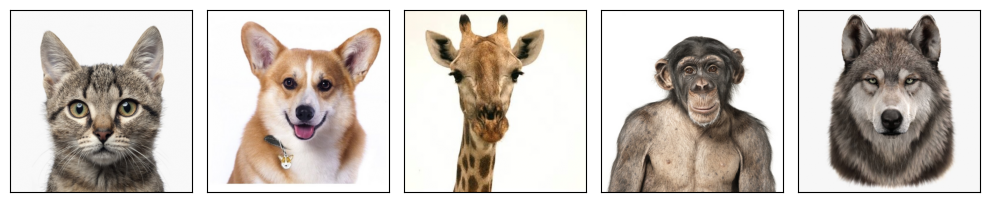

In [7]:
plt.figure(figsize=(10, 3))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.savefig('zoo.png', facecolor=(0,0,0,0))
plt.show()

Для визуализации в дальнейшем также загрузим изображение стрелки.

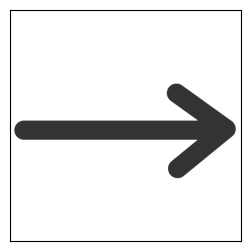

In [8]:
arrow = plt.imread('animals/arrow.png')

plt.figure(figsize=(3, 3))
plt.imshow(arrow)
plt.xticks([])
plt.yticks([]);

Напишем функцию, реализующую бутстреп. Вам необходимо заполнить пропуски, где они есть. Помните, что картинки &mdash; это просто трехмерные массивы, а значит на них определены все арифметические операции.

In [9]:
def zoo_bootstrap(images, B=6, draw=False):
    '''
    Генерирует B бутстрепных выборок изображений
    и возвращает среднее по каждой из них.
    Если указан параметр draw, то рисует процесс на графике.
    '''
    # размер выборки
    n = len(images)
    # средние по бутстрепным выборкам
    bootstrap_means = []

    if draw:
        plt.figure(figsize=(11.5, 9.5))

    for b in range(B):
        # сумма элементов в бутстрепной выборке
        sum_bsample = 0

        for i in range(5):
            # генерируем элемент бутстрепной выборки
            ind = np.random.choice(np.arange(0,n))
            # добавляем его к сумме по этой выборке
            sum_bsample += images[ind]

            # визуализация элемента бутстрепной выборки
            if draw:
                plt.subplot(B, n+2, b*(n+2)+i+1)
                plt.imshow(images[ind])
                plt.xticks([]), plt.yticks([])
                if i == 0:
                    plt.ylabel('$X^*_{}$:       '.format(b+1),
                               rotation=0, fontsize=26)

        # добавляем среднее по бутстрепной выборке
        current_mean = sum_bsample/5
        bootstrap_means.append(current_mean)

        if draw:
            # стрелка
            plt.subplot(B, n+2, b*(n+2)+i+2)
            plt.imshow(arrow)
            plt.axis('off'), plt.xticks([]), plt.yticks([])
            # среднее по бутстрепной выборке
            plt.subplot(B, n+2, b*(n+2)+i+3)
            plt.imshow(bootstrap_means[-1])
            plt.xticks([]), plt.yticks([])

    if draw:
        plt.tight_layout()
        plt.savefig('animals/zoo_bootstrap.png', facecolor=(0,0,0,0))
        plt.show()

    return bootstrap_means

Посмотрим, что получается на выборках размера 6. Ниже будет выведена схема бутстрепа. По строкам изображены бутстрепные выборки (разумеется, размера 5). В последнем столбце по каждой бутстрепной выборке посчитано среднее всех пикселей.

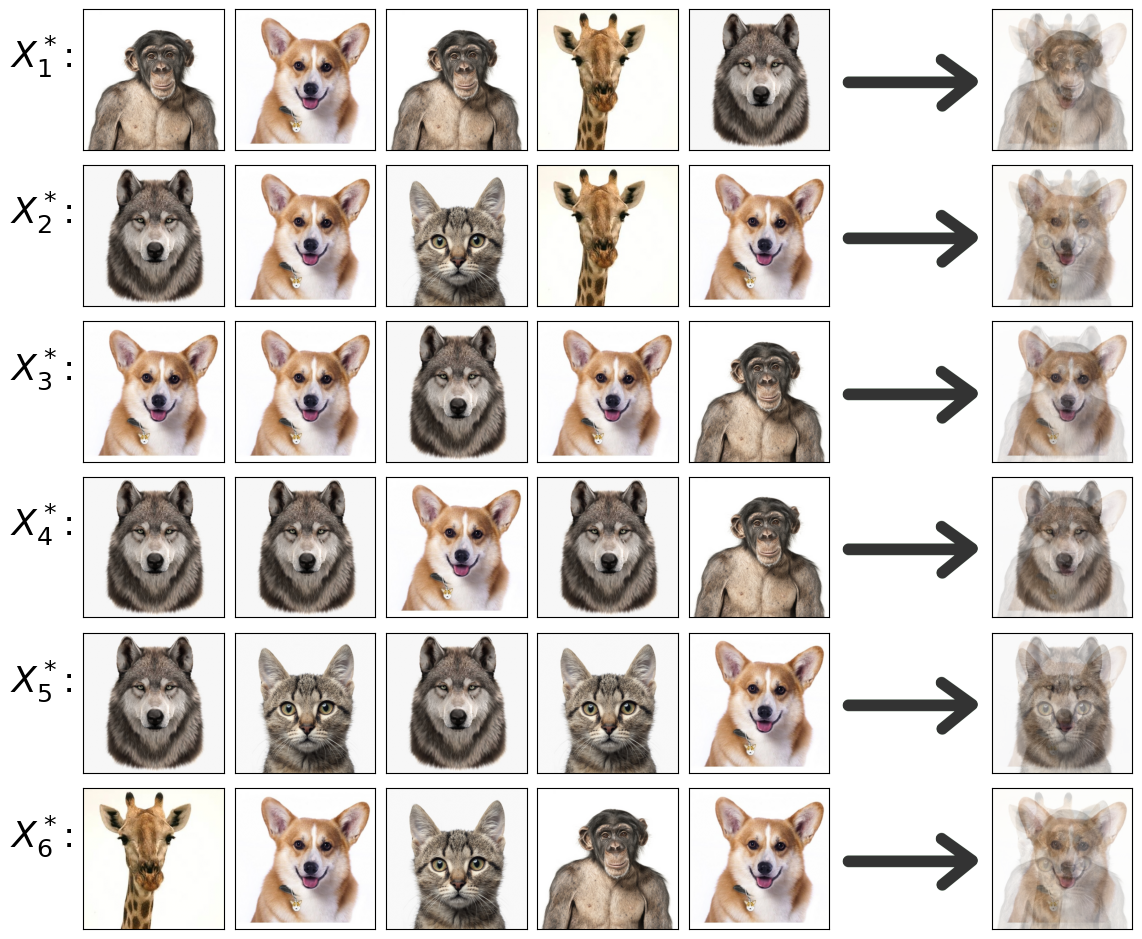

In [10]:
bootstrap_means = zoo_bootstrap(images, draw=True)

По бутстрепной выборке средних (правый столбец выше) можем посчитать выборочную дисперсию для каждого пикселя. Поскольку цвета изображения должны быть от 0 до 1, для визуализации нормируем все дисперсии на максимальное значение по всем пикселям и цветовым каналам. Очевидно, что минимальное значение дисперсий равно нулю --- в крайних пикселях всегда белый фон.

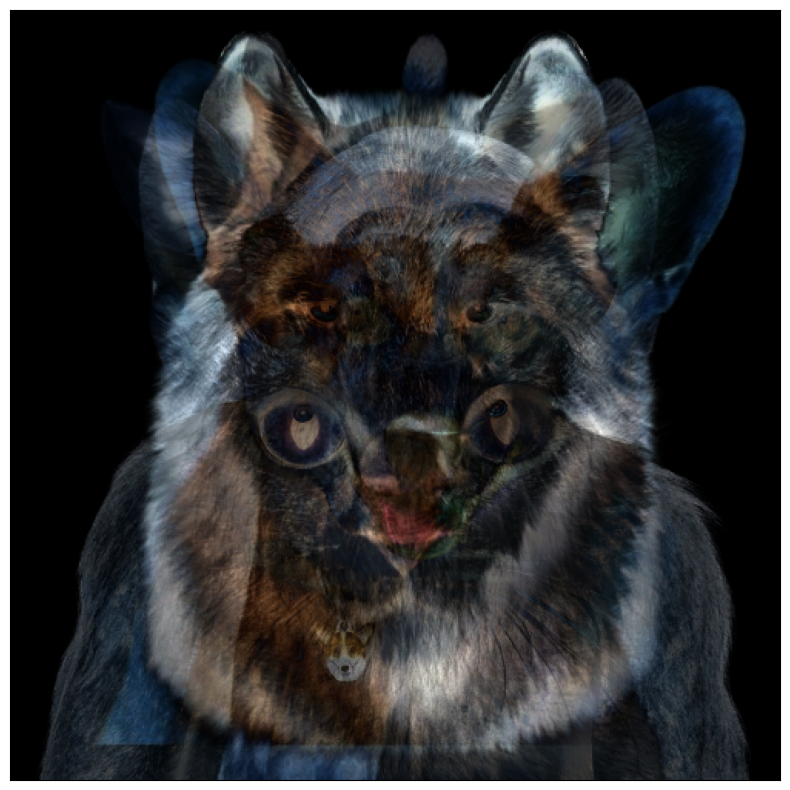

In [11]:
bootstrap_var = np.var(bootstrap_means, 0)
bvar_normed = bootstrap_var / bootstrap_var.max(axis=(0, 1)).reshape((1, 1, 3))

plt.figure(figsize=(10, 10))
plt.imshow(bvar_normed)
plt.xticks([]), plt.yticks([]);
plt.savefig('animals/zoo_bootstrap_var.png', facecolor=(0,0,0,0))
plt.show()

Посмотрим на результат при большем количестве бутстрепных выборок

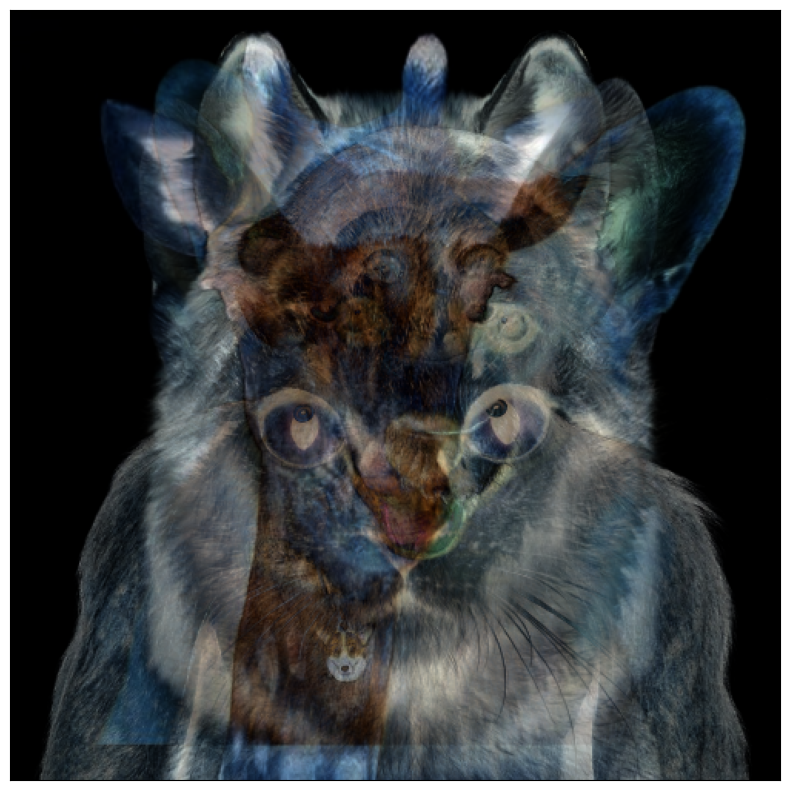

In [12]:
bootstrap_means = zoo_bootstrap(images, B=300)
bootstrap_var = np.var(bootstrap_means, 0)
bvar_normed = bootstrap_var / bootstrap_var.max(axis=(0, 1)).reshape((1, 1, 3))

plt.figure(figsize=(10, 10))
plt.imshow(bvar_normed)
plt.xticks([]), plt.yticks([]);
plt.savefig('animals/zoo_bootstrap_var.png', facecolor=(0,0,0,0))
plt.show()

**Вывод:** когда мы берем большое количество бутстрепных выборок, то каждое животное становится лучше видно, так как более точно вычисляется среднее.

## Задача 2

### Bias-variance

Сравним между собой несколько оценок в среднеквадратичном подходе и рассмотрим, что представляет из себя bias-variance tradeoff. Рассмотрим $X_1,...,X_n$ &mdash; выборку из распределения $U[0, \theta]$. Будем сравнивать между собой оценки: $2\overline{X}$, $X_(n)$, $\frac{n + 1}{n}X_(n)$

Для сравнения оценок между собой можно использовать различные функции риска. В данном случае мы рассмотрим MSE (Mean Squared Error), которая распадается в сумму слагаемых, отвечающих двум важным свойствам оценок: смещение (насколько оценка в среднем отличается от истины) и разброс (насколько разные значения дает оценка).

- $bias^2 = (E\hat{\theta} - \theta)^2$

- $variance = D\hat{\theta} = E\hat{\theta}^2 - (E\hat{\theta})^2$

- $MSE = E(\theta - \hat{\theta})^2 = bias^2 + variance$

Для удобства вычислений приведем первые моменты случайных величин.
- $EX_1 = \frac{\theta}{2}, EX_1^2 = \frac{\theta^2}{12}$;

- $EX_{(n)} = \frac{n}{n + 1}\theta, EX_{(n)}^2 = \frac{n}{n + 2}\theta^2$.

Выпишите формулы $bias^2$ и variance для каждой из трех оценок:

$2\overline{X}: bias^2 = 0, variance = \frac{\theta^2 }{3n}$

$X_n: bias^2 = \theta^2(\frac{1}{n-1})^2, variance = \theta^2 \frac{n}{(n+1)^2(n+2)}$

$\frac{n + 1}{n}X_n: bias^2 = 0, variance = \theta^2 \frac{1}{n(n+2)} $

Как мы можем видеть, все слагаемые зависят от параметра $\theta$ квадратично, поэтому нам достаточно рассмотреть зависимость от размера выборки при фиксированном $\theta$.

Напишите функции, которые для массива размеров выборок и параметра $\theta$ будут возвращать два `np.array`: первый - массив квадратов смещений ($bias^2$), второй - массив дисперсий ($variance$), посчитанные по формулам выше.

In [44]:
def mean_estimator(n_range, theta=1):
    bias = np.array([0]*len(n_range))
    variance = np.array((theta**2/3)/n_range)

    return bias, variance

def max_estimator(n_range, theta=1):
    bias = np.array((theta**2*(1/(n_range+1)**2)))
    variance = np.array(theta**2*(n/(((n_range)+1)**2*((n_range)+1))))

    return bias, variance

def unbiased_max_estimator(n_range, theta=1):
    bias = np.array([0]*len(n_range))
    variance = np.array((theta**2*(1/(((n_range))*((n_range)+1)))))

    return bias, variance

In [27]:
def draw_bias_variance(n_range, estimator, label, color, axs):
    bias, variance = estimator(n_range)

    axs[0].plot(n_range, bias, color=color, label=label)
    axs[1].plot(n_range, variance, color=color, label=label)
    axs[2].plot(n_range, bias + variance, color=color, label=label)

    axs[0].set_title("$bias^2$")
    axs[1].set_title("$variance$")
    axs[2].set_title("$MSE$")

    for i, ax in enumerate(axs):
        ax.set_xlabel("Размер выборки")
        ax.set_ylabel("Значение метрики" if i == 0 else "")
        ax.legend(loc='center right')

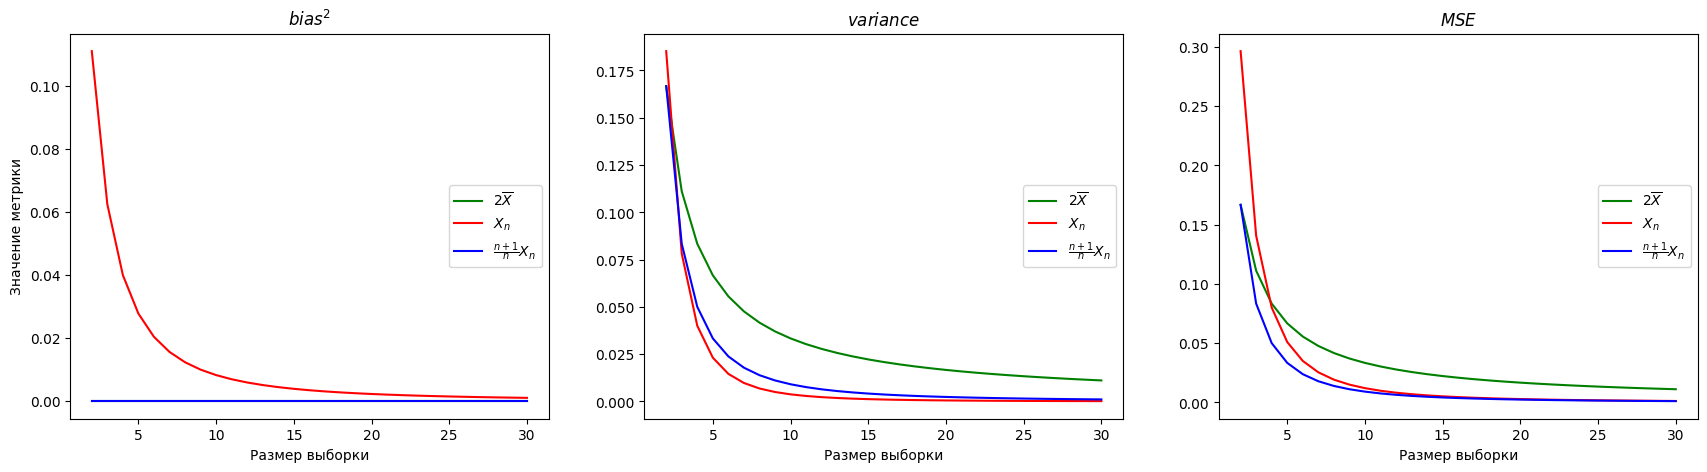

In [45]:
n_range = np.arange(2, 31)

estimators = [("$2\overline{X}$", mean_estimator, "green"),
              ("$X_n$", max_estimator, "red"),
              ("$\\frac{n + 1}{n}X_n$", unbiased_max_estimator, "blue")]

fig, axs = plt.subplots(ncols=3, figsize=(21, 5))

for name, estimator, color in estimators:
    draw_bias_variance(n_range, estimator, label=name, color=color, axs=axs)

Сделайте выводы из полученного графика. Как оценки отличаются между собой? Можно ли сравнить оценки в среднеквадратичном подходе?

**Вывод:** 1 и 3 оценки несмещенные (это видно на 1 графике). дисперсия самая большая у 1 оценки (второй график), соотвественно, можно применить среднеквадратичный подход, сравнивая дисперсии, у второй самая маленькая. но в итоге, смотря на mse, видим, что самой крутой оценкой оказывается последняя, у нее mse наименьший.

Теперь рассмотрим те же самые свойства оценок, но изобразим их на графике зависимости значения оценок от размера выборки.

Допишите функции ниже, чтобы они давали кумулятивные оценки.

In [73]:
def cumulitive_mean_estimator(X):
    return np.array([2*np.cumsum(X[i]) / np.arange(1, len(X[0]) + 1) for i in range(len(X))])

def cumulitive_max_estimator(X):
    return np.array([np.maximum.accumulate(X[i]) for i in range(len(X))])

def cumulitive_unbiased_max_estimator(X):
    return np.array([np.maximum.accumulate(X[i]) * (np.arange(1, len(X[0]) + 1) + 1) / np.arange(1, len(X[0]) + 1) for i in range(len(X))])

In [74]:
def draw_estimations(estimations, label, color, alpha=0.1):
    n_range = np.arange(estimations.shape[-1]) + 1

    for i in range(len(estimations)):
        plt.plot(n_range, estimations[i],
                alpha=alpha, color=color)

    plt.plot(n_range, np.mean(estimations, axis=0),
             label=label, color=color, linewidth=3)

    plt.ylim(0.25, 1.5)
    plt.xlabel("Размер выборки")
    plt.ylabel("Значение оценки")
    plt.title("Зависимость оценки параметра от размера выборки")
    plt.legend()

In [75]:
sample_size = 20
sample_count = 30
X = sps.uniform.rvs(size=(sample_count, sample_size))

n_range = np.arange(sample_size) + 1

cumulitive_estimations = [(" Мат. ож. $2\overline{X}$", cumulitive_mean_estimator(X), "green"),
                        ("$Мат. ож. X_n$", cumulitive_max_estimator(X), "red"),
                        ("$Мат. ож. \\frac{n + 1}{n}X_n$", cumulitive_unbiased_max_estimator(X), "blue")]

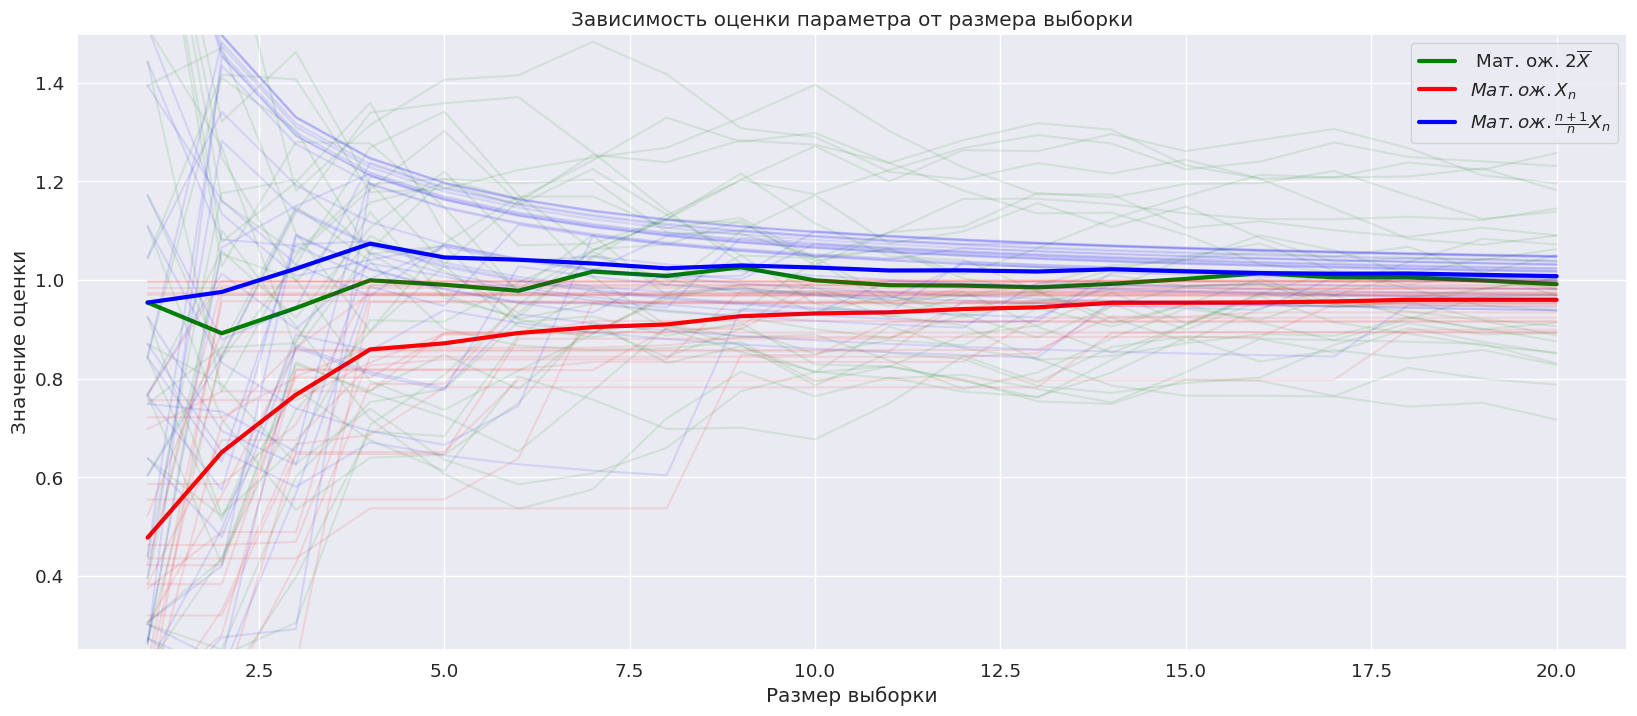

In [76]:
sns.set(font_scale=1.2, palette='Set2')
plt.figure(figsize=(20, 8))

for label, estimations, color in cumulitive_estimations:
    draw_estimations(estimations, label, color)

Сделайте выводы. Согласуются ли результаты с предыдущими? Как проявляются различия в смещенности и разбросе оценок на графике?

**Выводы:** да, согласуется, 1 оценка имеет большую дисперсию, но несмщенная.

вторая оценка смщенная, но с маленьким "разбросом"

третья оценка лучше всего стремится к истинной theta.